## K Means Clustering with scraped data

In [154]:
import d2l
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mxnet.contrib import text
from sklearn.metrics import silhouette_score

In [155]:
df = pd.read_csv('scraped_data.csv')
df.head()

,headline,article,date,category
0,From Loss Of Smell To 'COVID Toes': What Exper...,It's not just a fever and dry cough. For milde...,5/6/2020,Goats and Soda
1,"As Businesses Reopen, A Fight Is Brewing Over ...",Republican Senate Leader Mitch McConnell insis...,5/6/2020,Coronavirus Live Updates
2,"Michigan Legislature Sues Gov. Whitmer, Seekin...",The legislators say the governor is acting ill...,5/6/2020,Coronavirus Live Updates
3,The Risk Of Coronavirus In Afghanistan's Priso...,The Taliban accuse the government of spreading...,5/6/2020,Coronavirus Live Updates
4,Officials Investigating Multiple COVID-19 Deat...,Multiple investigations are underway at the So...,5/6/2020,Coronavirus Live Updates


In [156]:
pd.value_counts(df['category'])

The Two-Way             5658
Politics                3713
National                2821
Shots - Health News     2071
Goats and Soda          1161
                        ... 
Your Health                1
Guilty And Charged         1
Tiny Desk Fest             1
#KillerViruses             1
how to raise a human       1
Name: category, Length: 242, dtype: int64

The data source used is 27k articles scraped from NPR news archive. As shown above, there are 242 categories associated with these articles.It's not only too many categories for articles, but a lot of them are not really a category like 'The Two-Way' and 'Goats and Soda', which are more like their article series name, so I decided to do unsupervised learning to see if it categorize better. The method I choose is K-Means Clustering.

### K-Means with news headlines

In [130]:
# Choosing headlines column

df_headline = df['headline']

len(df_headline)

27035

In [131]:
df_headline = d2l.tokenize(df_headline, token = 'word')

In [132]:
df_headline[0]

['From',
 'Loss',
 'Of',
 'Smell',
 'To',
 "'COVID",
 "Toes':",
 'What',
 'Experts',
 'Are',
 'Learning',
 'About',
 'Symptoms']

In [133]:
vocab = d2l.Vocab(df_headline, min_freq=4, reserved_tokens=['<pad>'])

print(list(vocab.token_to_idx.items())[0:10])

[('<unk>', 0), ('<pad>', 1), ('To', 2), ('In', 3), ('The', 4), ('Of', 5), ('A', 6), ('For', 7), ('And', 8), ('On', 9)]


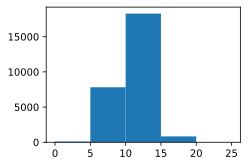

In [134]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.hist([len(line) for line in df_headline], bins=range(0, 30, 5));

In [135]:
num_steps=100

df_headline = np.array([d2l.truncate_pad(
    vocab[line], num_steps, vocab['<pad>']) for line in df_headline])

In [136]:
df_headline

array([[  19, 1228,    5, ...,    1,    1,    1],
       [  16,  932,    0, ...,    1,    1,    1],
       [ 902, 2981,  755, ...,    1,    1,    1],
       ...,
       [   0,    8, 5018, ...,    1,    1,    1],
       [  52,    3, 7106, ...,    1,    1,    1],
       [ 252,  202, 1039, ...,    1,    1,    1]])

In [137]:
df_headline.shape

(27035, 100)

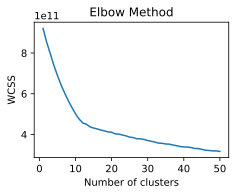

In [139]:
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_headline)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

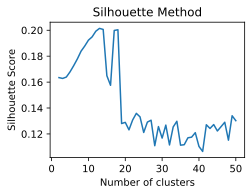

In [103]:
sil = []

for i in range(2, 51):
    kmeans = KMeans(n_clusters=i).fit(df_headline)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_headline, labels, metric = 'euclidean'))
plt.plot(range(2, 51), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [126]:
for i in zip(range(2,51),sil):
    print(f" numner of cluster : {i[0]}, Silhouette Score: {i[1]}")

 numner of cluster : 2, Score: 0.16346477549720914
 numner of cluster : 3, Score: 0.1628212595241386
 numner of cluster : 4, Score: 0.16390025463301688
 numner of cluster : 5, Score: 0.1678958212463512
 numner of cluster : 6, Score: 0.1726973480192019
 numner of cluster : 7, Score: 0.17791765438540322
 numner of cluster : 8, Score: 0.18386294206861856
 numner of cluster : 9, Score: 0.18783905171057177
 numner of cluster : 10, Score: 0.19235126404367858
 numner of cluster : 11, Score: 0.19487891722292008
 numner of cluster : 12, Score: 0.19924387288051865
 numner of cluster : 13, Score: 0.2014302081477596
 numner of cluster : 14, Score: 0.20062601513750777
 numner of cluster : 15, Score: 0.16492930084927163
 numner of cluster : 16, Score: 0.1575358130082224
 numner of cluster : 17, Score: 0.1998381763454969
 numner of cluster : 18, Score: 0.20036093544348485
 numner of cluster : 19, Score: 0.12803976097235714
 numner of cluster : 20, Score: 0.12894577597885953
 numner of cluster : 21, S

### K-Means with news articles

In [168]:
df_article = df['article']

len(df_article)

27035

In [169]:
df_article = d2l.tokenize(df_article, token = 'word')

In [170]:
df_article[0]

["It's",
 'not',
 'just',
 'a',
 'fever',
 'and',
 'dry',
 'cough.',
 'For',
 'milder',
 'cases',
 'of',
 'COVID-19,',
 'the',
 'array',
 'of',
 'symptoms',
 'can',
 'include',
 'headaches,',
 'fatigue,',
 'loss',
 'of',
 'smell',
 'and',
 'even',
 'lesions',
 'on',
 'the',
 'feet',
 'known',
 'as',
 '"COVID',
 'toes."']

In [171]:
vocab = d2l.Vocab(df_article, min_freq=4, reserved_tokens=['<pad>'])

print(list(vocab.token_to_idx.items())[0:10])

[('<unk>', 0), ('<pad>', 1), ('the', 2), ('to', 3), ('of', 4), ('a', 5), ('and', 6), ('in', 7), ('The', 8), ('for', 9)]


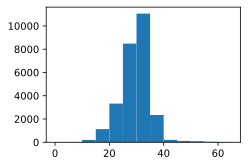

In [174]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.hist([len(line) for line in df_article], bins=range(0, 70, 5));

In [175]:
num_steps=100

df_article = np.array([d2l.truncate_pad(
    vocab[line], num_steps, vocab['<pad>']) for line in df_article])

In [176]:
df_article

array([[ 100,   49,   96, ...,    1,    1,    1],
       [ 134,  147, 2260, ...,    1,    1,    1],
       [   8, 6599,   50, ...,    1,    1,    1],
       ...,
       [  42,  264, 1072, ...,    1,    1,    1],
       [ 912,    5, 3371, ...,    1,    1,    1],
       [ 377,   66,  182, ...,    1,    1,    1]])

In [177]:
df_article.shape

(27035, 100)

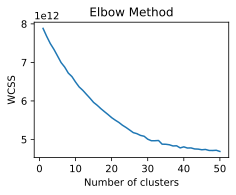

In [178]:
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_article)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

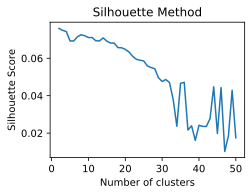

In [179]:
sil = []

for i in range(2, 51):
    kmeans = KMeans(n_clusters=i).fit(df_article)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_article, labels, metric = 'euclidean'))
plt.plot(range(2, 51), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [180]:
for i in zip(range(2,51),sil):
    print(f" numner of cluster : {i[0]}, Silhouette Score: {i[1]}")

 numner of cluster : 2, Silhouette Score: 0.0759724512892559
 numner of cluster : 3, Silhouette Score: 0.07490772188448516
 numner of cluster : 4, Silhouette Score: 0.07427989653500477
 numner of cluster : 5, Silhouette Score: 0.06925136333885165
 numner of cluster : 6, Silhouette Score: 0.06924693258411505
 numner of cluster : 7, Silhouette Score: 0.07145933612066092
 numner of cluster : 8, Silhouette Score: 0.07259711311340891
 numner of cluster : 9, Silhouette Score: 0.07202137423251792
 numner of cluster : 10, Silhouette Score: 0.07107986027707933
 numner of cluster : 11, Silhouette Score: 0.07107156075785698
 numner of cluster : 12, Silhouette Score: 0.06935602855231393
 numner of cluster : 13, Silhouette Score: 0.06926119338396813
 numner of cluster : 14, Silhouette Score: 0.07088680471431938
 numner of cluster : 15, Silhouette Score: 0.0691471238377063
 numner of cluster : 16, Silhouette Score: 0.06812361696810598
 numner of cluster : 17, Silhouette Score: 0.06809372669839334
 n